In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv('./unipass_crawling_1005_dedup.csv') # 전체 중복 제거 데이터
print(data.head())

   번호        시행일자        HSCode  \
0   1  2025-08-28  8543.70-2090   
1   2  2025-08-28  3212.90-1000   
2   3  2025-08-28  8543.70-2090   
3   4  2025-08-28  3212.90-1000   
4   5  2025-08-28  7007.19-1000   

                                                  이름  \
0                ERGOBODY SHAPY EMS BELT; EB24-SB03;   
1  Colouring matter, put up in forms for retail s...   
2  DEHUMIDIFICATION AND AROMATHERAPY MACHINE (Lav...   
3  Colouring matter, put up in forms for retail s...   
4                                     SODALIME GLASS   

                                                  설명  \
0  - 전극 패드가 내장된 직물 재질의 벨트와 컨트롤러, 충전 케이블이 지제 박스에 소...   
1  o Eosin-Y dye, Acetic acid, Isopropyl alcohol,...   
2  - 향기 타블렛과 제습비즈를 본체에 삽입 후 팬을 구동시켜 방향․제습하고, UV L...   
3  o Eosin-Y dye, Phosphotungstic acid hydrate, L...   
4  ㅇ 물품개요\n- 게임기 모니터의 전면부에 부착되는 Cover GLASS로, 이물질...   

                                                  사유  
0  - 관세율표 제8543호에는 ‘그 밖의 전기기기(이 류에 따로 분류되지 않은 것으로...  
1  o 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29961 entries, 0 to 29960
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      29961 non-null  int64 
 1   시행일자    29960 non-null  object
 2   HSCode  29960 non-null  object
 3   이름      29959 non-null  object
 4   설명      29947 non-null  object
 5   사유      29957 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [4]:
print(data['HSCode'].nunique()) # 구별된는 HS 코드 개수 확인
print(data['번호'].nunique())

4352
29961


In [5]:
# HS Code를 기준으로 데이터프레임 재생성
b = data.groupby('HSCode').size().reset_index()
print(b)
print(b['HSCode'].value_counts())


            HSCode  0
0     (1) 제6815.10  1
1     (1)(28) : 제8  1
2     (상의)6110.30-  1
3     - 3926.30-00  2
4     - 3926.90-90  2
...            ... ..
4347  제9506.99-000  1
4348  제9610.00-900  1
4349  제9616.10-000  1
4350  초코릿 제1806.90  1
4351  풍력발전기 8502.3  1

[4352 rows x 2 columns]
HSCode
제8708.99-900    1
제9001.90-100    1
제9001.90-300    1
제9003.90-000    1
제9004.90-909    1
               ..
- 3926.30-00    1
- 3926.90-90    1
- 6805.20-00    1
- 7326.90-90    1
- 7409.40-10    1
Name: count, Length: 4352, dtype: int64


In [6]:
## HS Code 분포 정도 파악
c = data['HSCode'].value_counts().reset_index()
print(c)

            HSCode  count
0     8708.29-0000   1059
1     3926.90-9000    577
2     8302.30-0000    475
3     7326.90-9000    398
4     3926.30-0000    371
...            ...    ...
4347  7116.20-9090      1
4348  7401.00-1000      1
4349  0303.67-0000      1
4350  제6602.00-100      1
4351  제6116..10-00      1

[4352 rows x 2 columns]


In [8]:
# HS Code에서 숫자로 시작하는 데이터만 추출
c_filtered = c[c['HSCode'].astype(str).str.match(r'^\d')]
print(c_filtered)

            HSCode  count
0     8708.29-0000   1059
1     3926.90-9000    577
2     8302.30-0000    475
3     7326.90-9000    398
4     3926.30-0000    371
...            ...    ...
4335  8804.00-9010      1
4342  8542.33-3000      1
4347  7116.20-9090      1
4348  7401.00-1000      1
4349  0303.67-0000      1

[3470 rows x 2 columns]


In [9]:
c_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3470 entries, 0 to 4349
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HSCode  3470 non-null   object
 1   count   3470 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [11]:
# HS Code에서 앞자리 숫자만 추출
c_filtered['start'] = c_filtered['HSCode'].str[:1]
print(c_filtered)


            HSCode  count start
0     8708.29-0000   1059     8
1     3926.90-9000    577     3
2     8302.30-0000    475     8
3     7326.90-9000    398     7
4     3926.30-0000    371     3
...            ...    ...   ...
4335  8804.00-9010      1     8
4342  8542.33-3000      1     8
4347  7116.20-9090      1     7
4348  7401.00-1000      1     7
4349  0303.67-0000      1     0

[3470 rows x 3 columns]


/tmp/ipykernel_8608/1521521535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_filtered['start'] = c_filtered['HSCode'].str[:1]


In [12]:
c_filtered[c_filtered['start']=='0']

,HSCode,count,start
273,0409.00-0000,20,0
290,0904.22-0000,19,0
361,0406.30-0000,15,0
370,0902.10-0000,14,0
375,0712.90-2099,14,0
...,...,...,...
3981,0813.50-0000,1,0
4071,0401.50-9000,1,0
4306,0303.42-0000,1,0
4320,0712.33-0000,1,0


In [13]:
# 시작 숫자를 기준으로 count
c_count = c_filtered['start'].value_counts().reset_index()
print(c_count)

  start  count
0     8    994
1     2    470
2     3    428
3     9    322
4     7    313
5     6    241
6     1    215
7     4    175
8     5    160
9     0    152


In [ ]:
c_count.sort_values('start') # 순서 정렬

,start,count
9,0,152
6,1,215
1,2,470
2,3,428
7,4,175
8,5,160
5,6,241
4,7,313
0,8,994
3,9,322


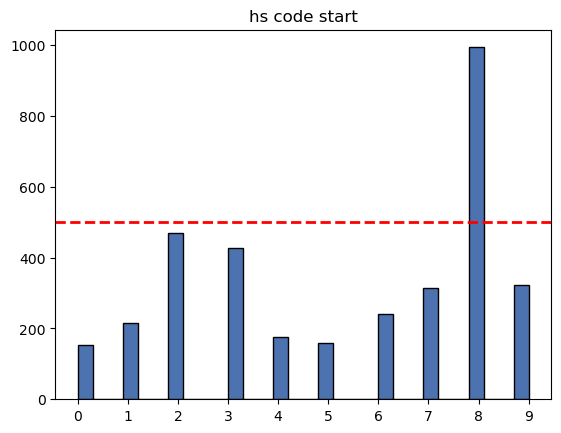

In [16]:
# 한눈에 파악하기 위해 그래프로
plt.hist(c_filtered.sort_values('start')['start'], bins=30, color='#4C72B0', edgecolor='black')
plt.axhline(y=500, color='red', linestyle='--', linewidth=2)
plt.title('hs code start')
plt.show()